In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from IPython.display import HTML

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable, functional
import torch.optim as optim
from torch.utils.data import Dataset, dataloader
from torchsummary import summary

import sys
sys.path.append('../src')
from model import *
from datagen import *

## Dataset

In [2]:
# Dataclass for adding problem

class Datamodel(Dataset):
    def __init__(self,time_pos_points,labels):
        self.x = time_pos_points
        self.y = labels
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

In [8]:
n_data = 2000
t_steps = 20

# data,labels = datagen_full_sum_normal(n_data,t_steps,normalize=True)
data,labels = datagen_circular_pm(n_data,t_steps)
# data,labels = datagen_timewise_labels(n_data,t_steps,2)
# print(data[1],labels[1])

BATCH_SIZE = 64

training_data = Datamodel(data,labels)
training_loader = torch.utils.data.DataLoader(training_data, batch_size=BATCH_SIZE, shuffle=True)

data.shape

print(labels[99])
print(data[99])

tensor([3.6869, 4.5588, 3.4734, 2.3379, 2.5637, 2.4585, 2.0101, 1.9286, 2.3557,
        3.1964, 2.8629, 3.6491, 3.8501, 3.2792, 3.2298, 2.7396, 3.8576, 4.0925,
        3.8200, 3.3408])
tensor([[ 0.0868],
        [ 0.1388],
        [-0.1728],
        [-0.1807],
        [ 0.0359],
        [-0.0167],
        [-0.0714],
        [-0.0130],
        [ 0.0680],
        [ 0.1338],
        [-0.0531],
        [ 0.1251],
        [ 0.0320],
        [-0.0909],
        [-0.0079],
        [-0.0780],
        [ 0.1779],
        [ 0.0374],
        [-0.0434],
        [-0.0763]])


## Model training

100%|██████████| 5000/5000 [04:28<00:00, 18.63it/s]


Losses array was not a multiple of average. Truncated to 4980


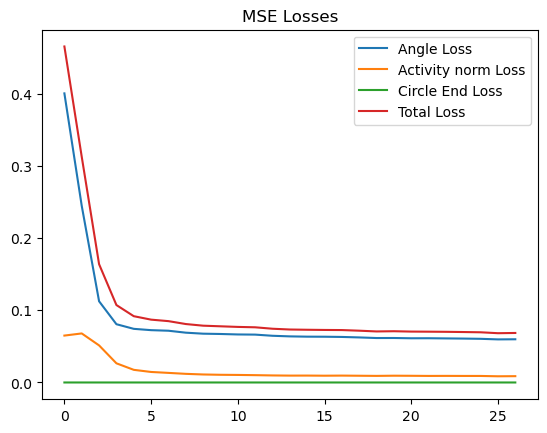

Guess on the first 15 training data:  tensor([[[ 0.0733,  0.1012,  0.0756,  ...,  0.0971,  0.0686,  0.0883],
         [ 0.0733,  0.1012,  0.0756,  ...,  0.0971,  0.0686,  0.0883],
         [ 0.0733,  0.1012,  0.0756,  ...,  0.0971,  0.0686,  0.0883],
         ...,
         [ 0.0733,  0.1012,  0.0756,  ...,  0.0971,  0.0686,  0.0883],
         [ 0.0733,  0.1012,  0.0756,  ...,  0.0971,  0.0686,  0.0883],
         [ 0.0733,  0.1012,  0.0756,  ...,  0.0971,  0.0686,  0.0883]],

        [[ 0.0496,  0.1235,  0.0539,  ...,  0.1410,  0.0404,  0.0994],
         [ 0.0383,  0.1249,  0.0450,  ...,  0.1429,  0.0226,  0.1063],
         [ 0.0649,  0.1216,  0.0658,  ...,  0.1384,  0.0646,  0.0901],
         ...,
         [ 0.0427,  0.1243,  0.0484,  ...,  0.1421,  0.0294,  0.1037],
         [ 0.0346,  0.1253,  0.0421,  ...,  0.1435,  0.0166,  0.1087],
         [ 0.0934,  0.1181,  0.0882,  ...,  0.1336,  0.1097,  0.0726]],

        [[ 0.0314,  0.1295,  0.0357,  ...,  0.1668,  0.0211,  0.0805],
       

In [4]:
hidden_size = 128
input_size = 1
output_size = 1

train1 = True

if train1:
    # model2 = torch_RNN1(input_size,t_steps,output_size,hidden_size,lr=0.01,irnn=True,outputnn=False,Wx_normalize=True)
    # model1 = torch_RNN_full_manual(input_size,t_steps,output_size,hidden_size,lr=0.001,irnn=False,outputnn=True,Wx_normalize=False,activation=False)
    # model1 = RNN_L2(input_size,t_steps,output_size,hidden_size,lr=0.001,w_decay=0.000,act_decay=1000,irnn=False,outputnn=True,Wx_normalize=False,activation=False)
    model1 = RNN_circular_ND(input_size,t_steps,output_size,hidden_size,lr=0.0001,w_decay=0.000,act_decay=0.01,irnn=True,outputnn=False,Wx_normalize=False,activation=False,rotation_init=False,bias=False)
    # print("Guess on the first 15 training data: ", model1(data[0:15]))
    _ = model1.train(epochs=5000)
    model1.plot_losses(average=30)
    # model1.plot_accs()
    print("Guess on the first 15 training data: ", model1(data[0:15]))
    # print("Weight of the hidden layer: ",model2.rnn.weight_hh_l0, " Weight of the input layer: ",model2.rnn.weight_ih_l0)

In [45]:
_ = model1.train(epochs=1)

100%|██████████| 1/1 [00:00<00:00, 19.61it/s]


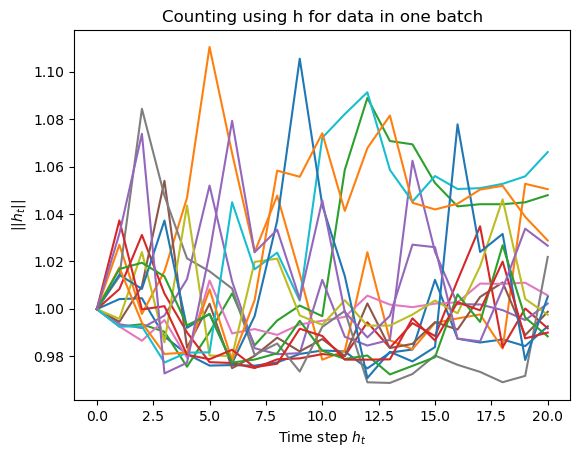

In [5]:
model1.hts.norm(dim=2).shape
htss = model1.hts.norm(dim=2)
plt.plot(htss.detach().numpy())
plt.title("Counting using h for data in one batch")
plt.xlabel(r"Time step $h_t$")
plt.ylabel(r"$||h_t||$")
plt.show()

torch.Size([21, 15, 128])


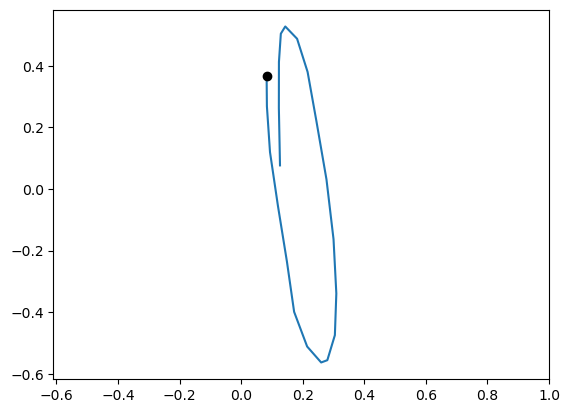

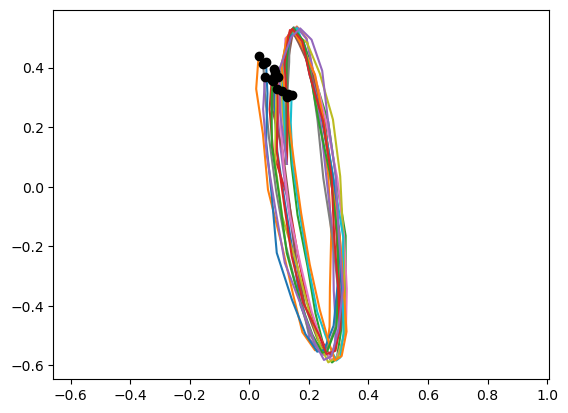

In [13]:
n = 0
print(model1.hts.shape)
model1.hts[:,n,:].shape
hts_cric = model1.hts.detach().numpy()
plt.plot(hts_cric[:,n,33],hts_cric[:,n,79],"-")
plt.plot(hts_cric[-1,n,33],hts_cric[-1,n,79],"o",color="black")
plt.axis("equal")
plt.show()
plt.plot(hts_cric[:,:,33],hts_cric[:,:,79],"-")
plt.plot(hts_cric[-1,:,33],hts_cric[-1,:,79],"o",color="black")
plt.axis("equal")
plt.show()

In [7]:
# See what dimension has the highest values

maxs = []

for i in range(128):
    maxs.append(max(hts_cric[:,n,i]))

# Sorted dimension from lowest to highest value in that dimension
print(torch.argsort(torch.tensor(maxs),dim=-1))

tensor([  3,  97,  90,  39,  61,  49,  14,  59,   0,  38,  81,  64,  74,  66,
         76,  80,  45, 121,  98,   2,  51,  40,  35,  52,  88,   4, 103, 116,
        102,  44,  71,  75,  65, 117,  11,   8,  37,  73, 101,  19,  92,  30,
         60,  20,  34, 123,  62,  28,  16,  89,  29, 112,  32,  77,  54,   5,
         24,  42,  17, 110,  25,  50,  46,  87,  63,  83, 124, 108, 105, 122,
         21, 119,   9,  10, 109,  56,  85,  43, 118,  67,  41,   7, 104,  48,
         69, 114,  70,  93,  96,  68, 126,  78, 111,  13,  26,  86,   6, 100,
         47,   1, 106,  94,  15,  58,  95,  27,  72,  99, 107,  18,  23, 127,
         82,  12, 113, 120,  57,  55, 125, 115,  91,  53,  31,  22,  33,  84,
         36,  79])


(19, 2000)


100%|██████████| 128/128 [00:00<00:00, 284.50it/s]


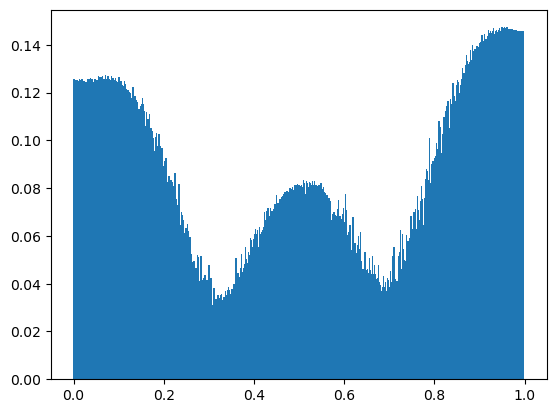

In [263]:
test_batch_size = 5000

# xs = data[0:test_batch_size]
xs = labels[0:test_batch_size,:-1]/(2*np.pi)
xs = xs.detach().numpy().T
print(xs.shape)

hts = model1(data[0:test_batch_size])

# Grid-cell histogram

hts = hts.detach().numpy() # Shape [t_steps, batch_size, hidden_size] = [21, 64, 128]

k = 1

hts_k = abs(hts[1:-1,:,k])

bin_means, bin_edges, binnumber = stats.binned_statistic(xs.flatten(),hts_k.flatten(),statistic='mean',bins=bins)
# Bar plot of the histogram
plt.bar(bin_edges[:-1],bin_means,width=6/bins)

# print(hts.shape)

# fig, ax = plt.subplots(32,4,subplot_kw={'projection': 'polar'})
# fig.set_size_inches(15, 80)
# fig.subplots_adjust(hspace=1,wspace=0.2)

bins = 2000
activity = np.zeros((128,bins))

import scipy.stats as stats
for k in tqdm(range(128)):
    # k = 103 # What cell to see the histogram of
    hts_k = abs(hts[1:-1,:,k])
    # print(hts_k.shape)

    # Bins equally spaced from 0 to 1 in time_steps amount of bins
    bin_means, bin_edges, binnumber = stats.binned_statistic(xs.flatten(),hts_k.flatten(),statistic='mean',bins=bins)
    activity[k,:] = bin_means
    np.nan_to_num(activity,copy=False)
    # Bar plot of the histogram
    # ax[k//4,k%4].bar(bin_edges[:-1]*2*np.pi,bin_means,width=6/bins)
    # # ax[].bar(bin_edges[:-1]*2*np.pi,bin_means,width=6/bins)
    # ax[k//4,k%4].set_title("Cell "+str(k))
    # Adjust space between subplots

# plt.show()





(2000, 2)


Text(0.5, 1.0, 'UMAP projection of the activity of the grid cells')

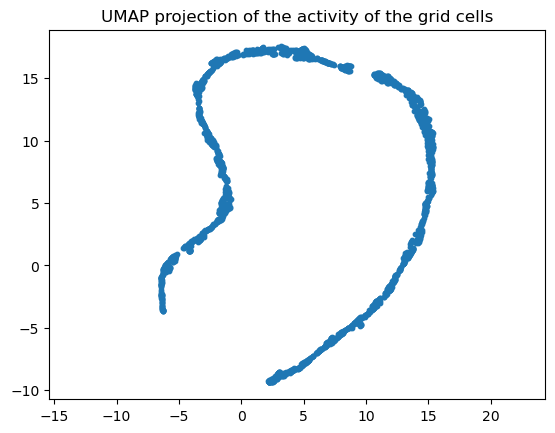

In [283]:
import umap


# draw_umap(activity.T,n_components=2, title='UMAP projection of the activity of the grid cells')
reducer = umap.UMAP(n_neighbors=15, n_components=2,min_dist=0.1)
reducer.fit(activity.T)
embedding = reducer.transform(activity.T)

print(embedding.shape)


plt.scatter(embedding[:, 0], embedding[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the activity of the grid cells', fontsize=12)


In [22]:
embedding.shape

(128, 2)

In [21]:
print(model1(data[10:11]))
print(data[10:11])
print(labels[10:11])

tensor([[[0.0881, 0.0696, 0.0802,  ..., 0.1221, 0.0867, 0.1033]],

        [[0.0860, 0.1025, 0.0484,  ..., 0.0985, 0.0856, 0.1381]],

        [[0.0550, 0.0641, 0.0333,  ..., 0.0939, 0.0547, 0.1601]],

        ...,

        [[0.0561, 0.0890, 0.1298,  ..., 0.1205, 0.0525, 0.1814]],

        [[0.0401, 0.1064, 0.0944,  ..., 0.0916, 0.0376, 0.1972]],

        [[0.0085, 0.0895, 0.0618,  ..., 0.0734, 0.0066, 0.1957]]],
       grad_fn=<CopySlices>)
tensor([[[0.0947],
         [0.0334],
         [0.0392],
         [0.0370],
         [0.0894],
         [0.0620],
         [0.0109],
         [0.0024],
         [0.0801],
         [0.0304],
         [0.0526],
         [0.0305],
         [0.0312],
         [0.0813],
         [0.0403],
         [0.0575],
         [0.0691],
         [0.0370],
         [0.0745],
         [0.0463]]])
tensor([[0.5953, 0.8052, 1.0518, 1.2845, 1.8463, 2.2357, 2.3043, 2.3193, 2.8227,
         3.0136, 3.3444, 3.5362, 3.7321, 4.2430, 4.4964, 4.8576, 5.2916, 5.5241,
         5.

[0.88985205 1.5943253  1.6918699  1.9212093  2.1175492  2.3820763
 2.462173   2.9037266  3.2410522  3.6669242  3.7671266  3.8978236
 4.2552404  4.5580707  4.7089963  5.373028   5.7246165  5.9413514
 6.1650343  6.2831855 ]


(-1.094810900092125,
 1.0997529000043869,
 -1.0999800890684128,
 1.0997090667486191)

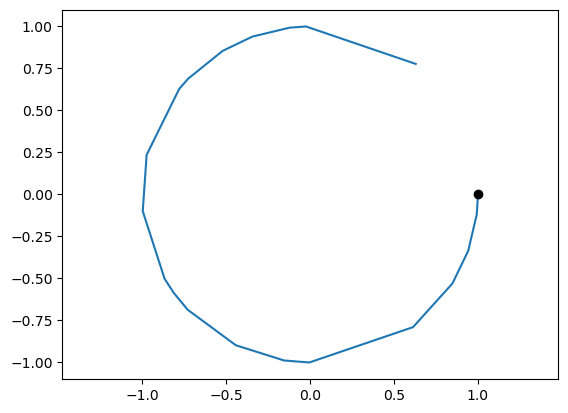

In [23]:
# Plot circle from data
data_raw = labels[91].detach().numpy()
print(data_raw)
data_points = np.zeros((t_steps,2))
for i in range(t_steps):
    data_points[i,0] = np.cos(data_raw[i])
    data_points[i,1] = np.sin(data_raw[i])


plt.plot(data_points[:,0],data_points[:,1],"-")
plt.plot(data_points[-1,0],data_points[-1,1],"o",color="black")
plt.axis("equal")

In [41]:
# print(model1.input.weight)
print(model1.hidden.weight)
# print(model1.Wh_init)
# print(model1.output.weight)

Parameter containing:
tensor([[ 9.9727e-01, -2.4026e-03,  1.5221e-03,  ..., -1.3721e-02,
         -2.6524e-03, -1.0302e-02],
        [-6.0067e-03,  9.9527e-01,  1.3260e-02,  ..., -3.2626e-02,
         -5.8051e-03, -1.3711e-02],
        [ 3.2771e-03,  2.9416e-03,  9.8951e-01,  ...,  2.4078e-02,
          3.1496e-03, -2.6117e-03],
        ...,
        [ 6.7108e-05,  1.6114e-03, -8.8490e-03,  ...,  1.0131e+00,
          4.7426e-04, -6.2874e-03],
        [-2.8013e-03, -2.5048e-03,  1.8150e-03,  ..., -1.5212e-02,
          9.9727e-01, -1.0147e-02],
        [ 5.5199e-03,  3.8632e-03,  7.3532e-03,  ...,  8.7989e-03,
          5.7970e-03,  9.8988e-01]], requires_grad=True)


In [25]:
# hc = 0
# for h in model2.hts[0][0]:
#     hc += h

# np.linalg.norm(model2.hts[0,0].detach().numpy())
an1 = model1.hts[:,0,:]
an1 = an1.detach().numpy()
print(an1.shape)

for i in range(1,len(an1)):
    an1_i_normalized = an1[i]/np.linalg.norm(an1[i])
    an1_i_minus_1_normalized = an1[i-1]/np.linalg.norm(an1[i-1])
    # print(an1_i_normalized @ an1_i_minus_1_normalized)
    # Angle between an1[i] and an1[i-1]
    ang = np.arccos(an1_i_normalized @ an1_i_minus_1_normalized)
    print(np.rad2deg(ang))



(21, 128)
25.176943
20.943316
19.573832
19.412601
24.731754
19.062946
25.280935
22.914154
23.920963
19.422926
18.855694
19.274466
18.578222
23.871458
18.940868
19.100554
20.233265
19.040253
21.658043
18.343588


In [26]:
# SVD of the weight matrix Wh

Wh = model1.hidden.weight.detach().numpy()
U, s, Vh = np.linalg.svd(Wh)
print("Singular values of Wh: ",s)

np.prod(s)
np.linalg.det(Wh)

Singular values of Wh:  [1.387341   1.0884748  1.0571073  1.0135168  1.0119452  1.0050696
 1.0017009  1.0014033  1.0006213  1.0002656  1.0001365  1.0000933
 1.0000511  1.0000175  1.0000076  1.0000051  1.0000044  1.0000037
 1.0000033  1.0000027  1.0000026  1.0000023  1.0000021  1.000002
 1.0000019  1.0000019  1.0000017  1.0000017  1.0000015  1.0000015
 1.0000015  1.0000014  1.0000014  1.0000012  1.0000012  1.0000011
 1.000001   1.000001   1.000001   1.000001   1.0000008  1.0000008
 1.0000008  1.0000007  1.0000007  1.0000007  1.0000007  1.0000007
 1.0000006  1.0000006  1.0000006  1.0000006  1.0000005  1.0000004
 1.0000004  1.0000004  1.0000002  1.0000002  1.0000002  1.0000002
 1.0000001  1.0000001  1.0000001  1.         1.         1.
 0.99999994 0.99999994 0.9999999  0.9999998  0.99999976 0.9999997
 0.9999997  0.99999964 0.9999996  0.9999995  0.99999946 0.99999946
 0.99999946 0.9999994  0.9999994  0.99999934 0.99999934 0.9999993
 0.9999992  0.9999992  0.99999917 0.99999917 0.9999991  0.9

0.649073

Norm av input: 6.412353703172115
Norm av Wh-skalert input 6.6714121790122585 ratio: 1.0403999042835068


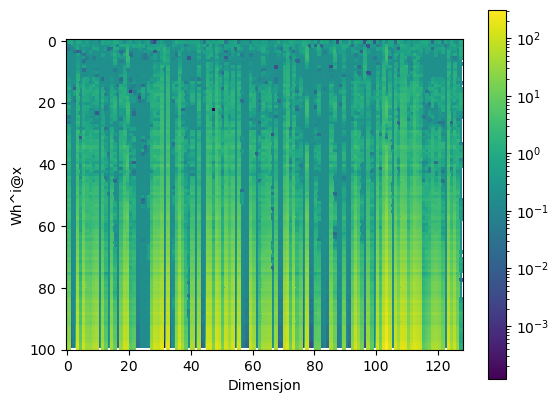

In [27]:
# Sjekker om Wh beholder normen til x 
x = np.random.uniform(size=hidden_size)
# x_const = np.ones((100,100))
x_const = np.random.uniform(size=(100,hidden_size))
print("Norm av input:", np.linalg.norm(x))
print("Norm av Wh-skalert input",np.linalg.norm(Wh @ x), "ratio:", np.linalg.norm(Wh @ x)/np.linalg.norm(x))
# Finner utviklingen av normen av Wh-skalert input
for i in range(1,100):
    Wx = model1.input.weight.detach().numpy()
    Wx_norm = np.linalg.norm(Wx)
    x_const[i] = np.linalg.matrix_power(Wh,i) @ x_const[i]
    # x_const[i] = np.linalg.matrix_power(Wh,i) @ Wx.squeeze()*x[i]
    # x_const[i] = Wx_norm**i* Wh**i @ x_const[i]
plt.imshow(x_const)
pcm = plt.pcolor(x_const, norm = "log")
plt.colorbar(pcm)
# plt.colorbar()
plt.xlabel("Dimensjon")
plt.ylabel("Wh^i@x")
plt.show()

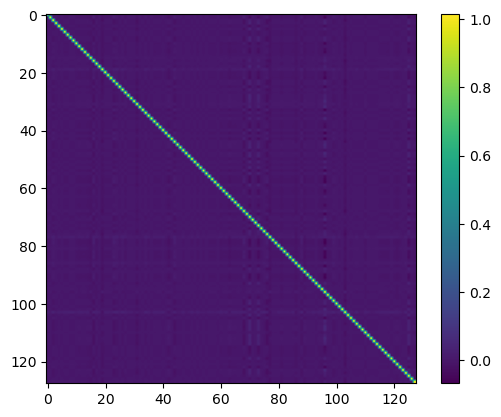

In [42]:
plt.imshow(Wh)
plt.colorbar()

In [29]:
Wx = model1.input.weight.detach().numpy()
print("Norm of Wx: ",np.linalg.norm(Wx))

Norm of Wx:  6.1375217


[[[ 0.08812919  0.07921302  0.05883741 ...  0.05886333  0.0450173
    0.01365804]
  [ 0.08812919  0.08617353  0.066831   ...  0.07142954  0.04683075
    0.01902745]
  [ 0.08812919  0.0689815   0.04648056 ...  0.04766146  0.03784984
    0.01318646]
  ...
  [ 0.08812919  0.08026849  0.04777715 ...  0.04165948  0.02631584
   -0.00779877]
  [ 0.08812919  0.07669116  0.0565532  ...  0.04969047  0.03342739
    0.00320659]
  [ 0.08812919  0.07490224  0.05305558 ...  0.09960073  0.06483421
    0.032758  ]]

 [[ 0.06955297  0.07660097  0.07172929 ...  0.07673585  0.1016245
    0.0875635 ]
  [ 0.06955297  0.10337082  0.10962297 ...  0.11234617  0.1041812
    0.10284936]
  [ 0.06955297  0.03725089  0.01369411 ...  0.04757234  0.08163992
    0.08925182]
  ...
  [ 0.06955297  0.08066025  0.03027615 ...  0.07499783  0.09283252
    0.06449099]
  [ 0.06955297  0.06690198  0.06035347 ...  0.08643236  0.10023523
    0.08528652]
  [ 0.06955297  0.06002188  0.04506394 ...  0.14343953  0.11039546
    0.100

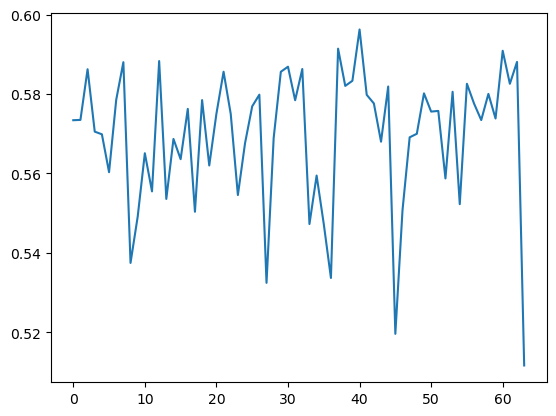

In [64]:
import numpy as np
from sklearn.decomposition import PCA

# PCA of the weight matrix Wh
print(model1.hts.squeeze().T.detach().numpy())

maxs = []
for i in range(0,64):
    pca = PCA(n_components=2)
    pca.fit(model1.hts[:,i,:].T.squeeze().detach().numpy())
    maxs.append(pca.explained_variance_ratio_[0])
    print("PCA variance ratio: ",pca.explained_variance_ratio_) # Variance explained by each component, the bigger the more a dimension is important
    print("PCA singular values: ",pca.singular_values_)
    # print("PCA components: ",pca.components_)
    # print("PCA mean: ",pca.mean_)
    print("PCA noise: ", pca.noise_variance_)

plt.plot(maxs)